In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization import (histogram, boxplot, scatterplot, hist_per_district, scatter_per_district,
                               ordered_barchart, correlation_plot)
from scipy import stats
%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#sns.set_context('poster')

path_processed = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/processed/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
df = pd.read_csv(path_processed+'data_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tipologia                                  7625 non-null   object 
 1   Zona                                       7625 non-null   object 
 2   Anno_costruzione                           5637 non-null   float64
 3   Stato                                      7426 non-null   object 
 4   Prezzo_EUR                                 7625 non-null   float64
 5   Superficie_m2                              7625 non-null   float64
 6   Prezzo_per_m2                              7625 non-null   float64
 7   Proprietà_I_N                              7250 non-null   object 
 8   Tipo_proprietà                             6589 non-null   object 
 9   A_reddito                                  7625 non-null   object 
 10  Riscaldamento_A_C       

In [42]:
df.describe()

,Anno_costruzione,Prezzo_EUR,Superficie_m2,Prezzo_per_m2,Posti_garage,Posti_esterni,Num_bagni,Num_tot_locali
count,"5,637.00","7,625.00","7,625.00","7,625.00","7,625.00","7,625.00","7,548.00","7,611.00"
mean,"1,900.91","344,908.85",88.41,"4,035.21",0.08,0.22,1.49,3.69
std,142.45,"152,165.48",36.36,"1,200.71",0.31,2.09,0.64,1.44
min,"1,000.00",700.00,5.00,18.42,0.00,0.00,1.00,1.00
25%,"1,900.00","235,000.00",60.00,"3,237.50",0.00,0.00,1.00,3.00
50%,"1,950.00","315,000.00",81.00,"3,928.57",0.00,0.00,1.00,4.00
75%,"1,970.00","420,000.00",110.00,"4,642.86",0.00,0.00,2.00,5.00
max,"2,021.00","880,000.00",197.00,"23,000.00",2.00,176.00,4.00,13.00


In [28]:
df.describe()

,Anno_costruzione,Prezzo_EUR,Superficie_m2,Prezzo_per_m2,Posti_garage,Posti_esterni,Num_bagni,Num_tot_locali
count,"6,334.00","8,714.00","8,714.00","8,714.00","8,714.00","8,714.00","8,609.00","8,693.00"
mean,"1,890.47","481,863.32",148.18,"4,157.12",0.13,0.30,1.68,4.23
std,155.37,"659,474.58","2,579.92","1,439.78",0.40,2.05,0.84,2.36
min,"1,000.00",700.00,5.00,4.58,0.00,0.00,1.00,1.00
25%,"1,900.00","248,000.00",65.00,"3,250.00",0.00,0.00,1.00,3.00
50%,"1,950.00","339,000.00",90.00,"3,968.75",0.00,0.00,1.00,4.00
75%,"1,970.00","501,000.00",129.00,"4,769.23",0.00,0.00,2.00,5.00
max,"2,021.00","28,000,000.00","240,018.00","23,000.00",2.00,176.00,4.00,47.00


### 1. Continous variables

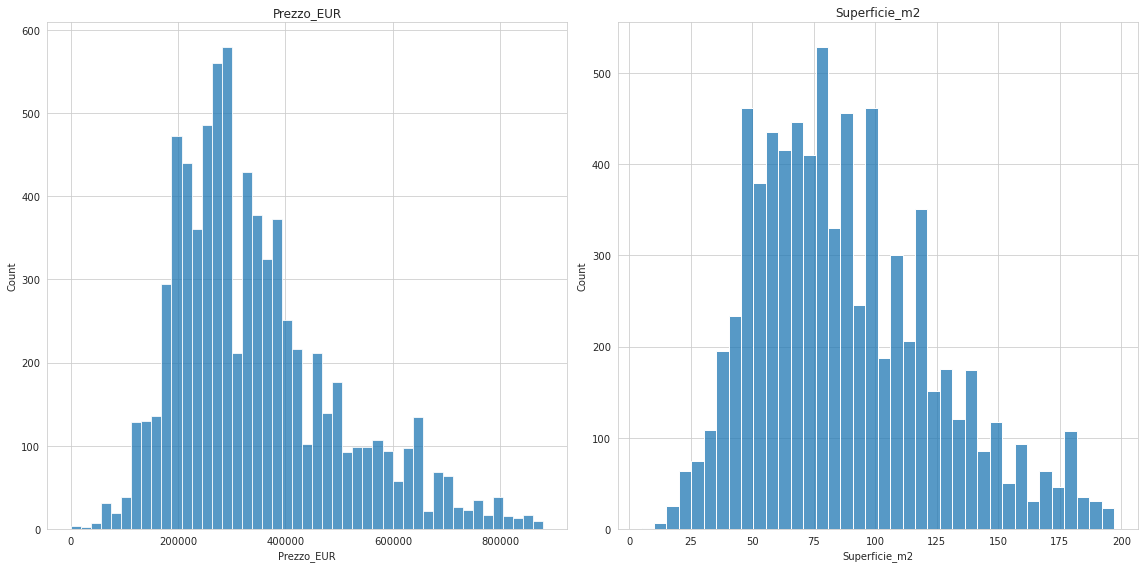

In [45]:
continuous_vars = ['Prezzo_EUR', 'Superficie_m2']
histograms = histogram(df, continuous_vars, transformation=None)
plt.show()

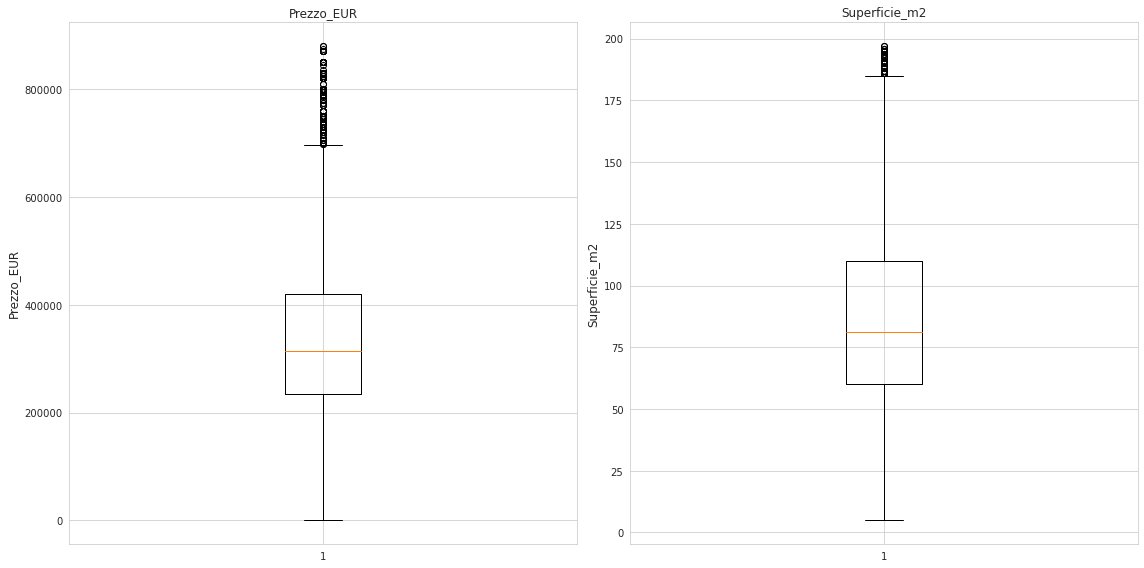

In [46]:
boxplots = boxplot(df, continuous_vars, transformation=None)
plt.show()

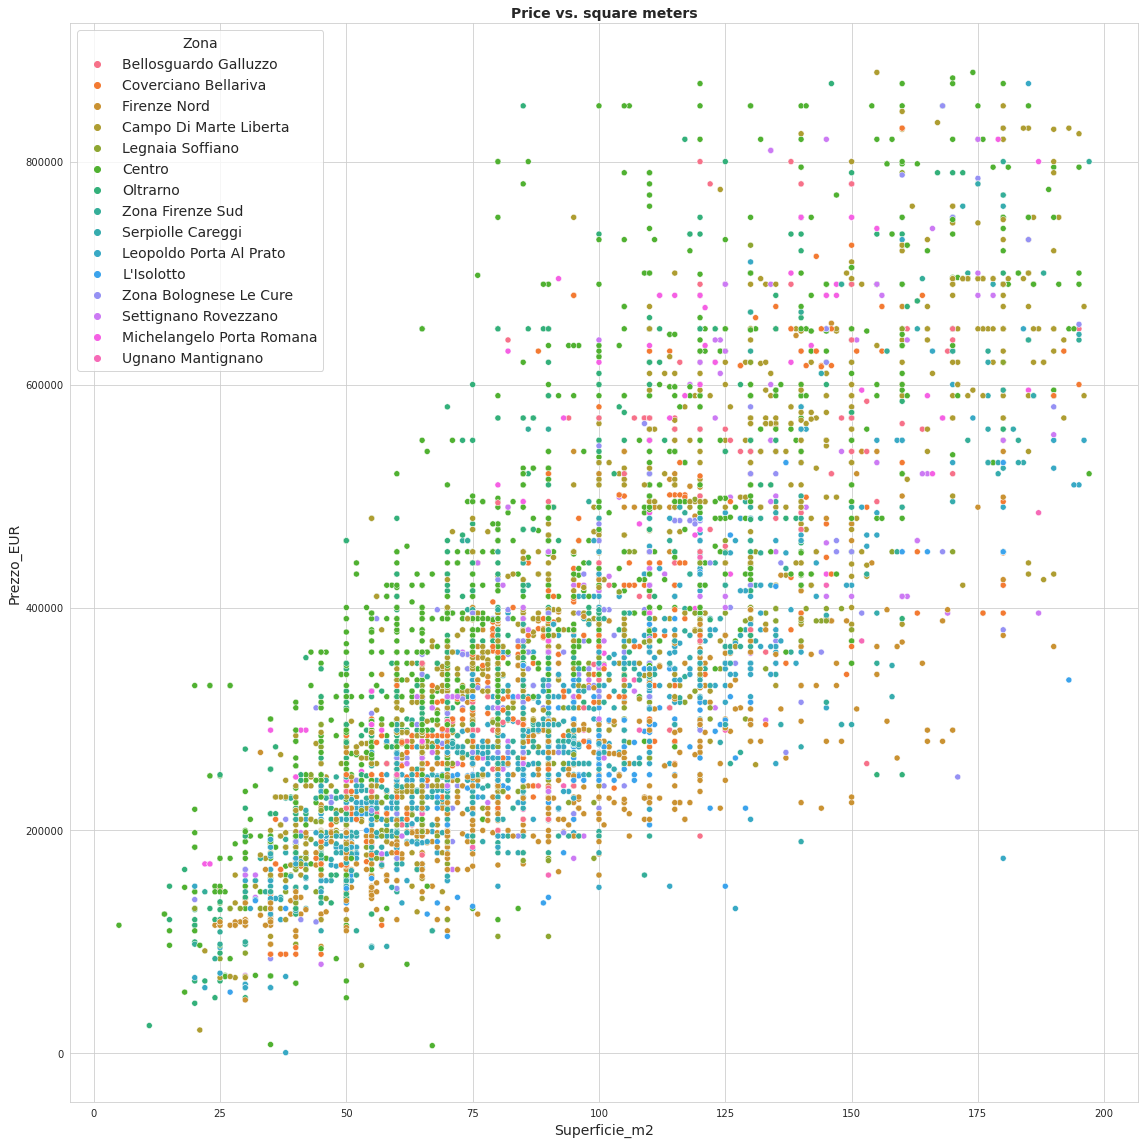

In [47]:
scatter = scatterplot(df, 'Superficie_m2', 'Prezzo_EUR', hue_data=df['Zona'], transformation=None)
plt.show()

In [ ]:
hists = hist_per_district(df, 'Zona', None, 'Prezzo_EUR', transformation=None)
plt.show()

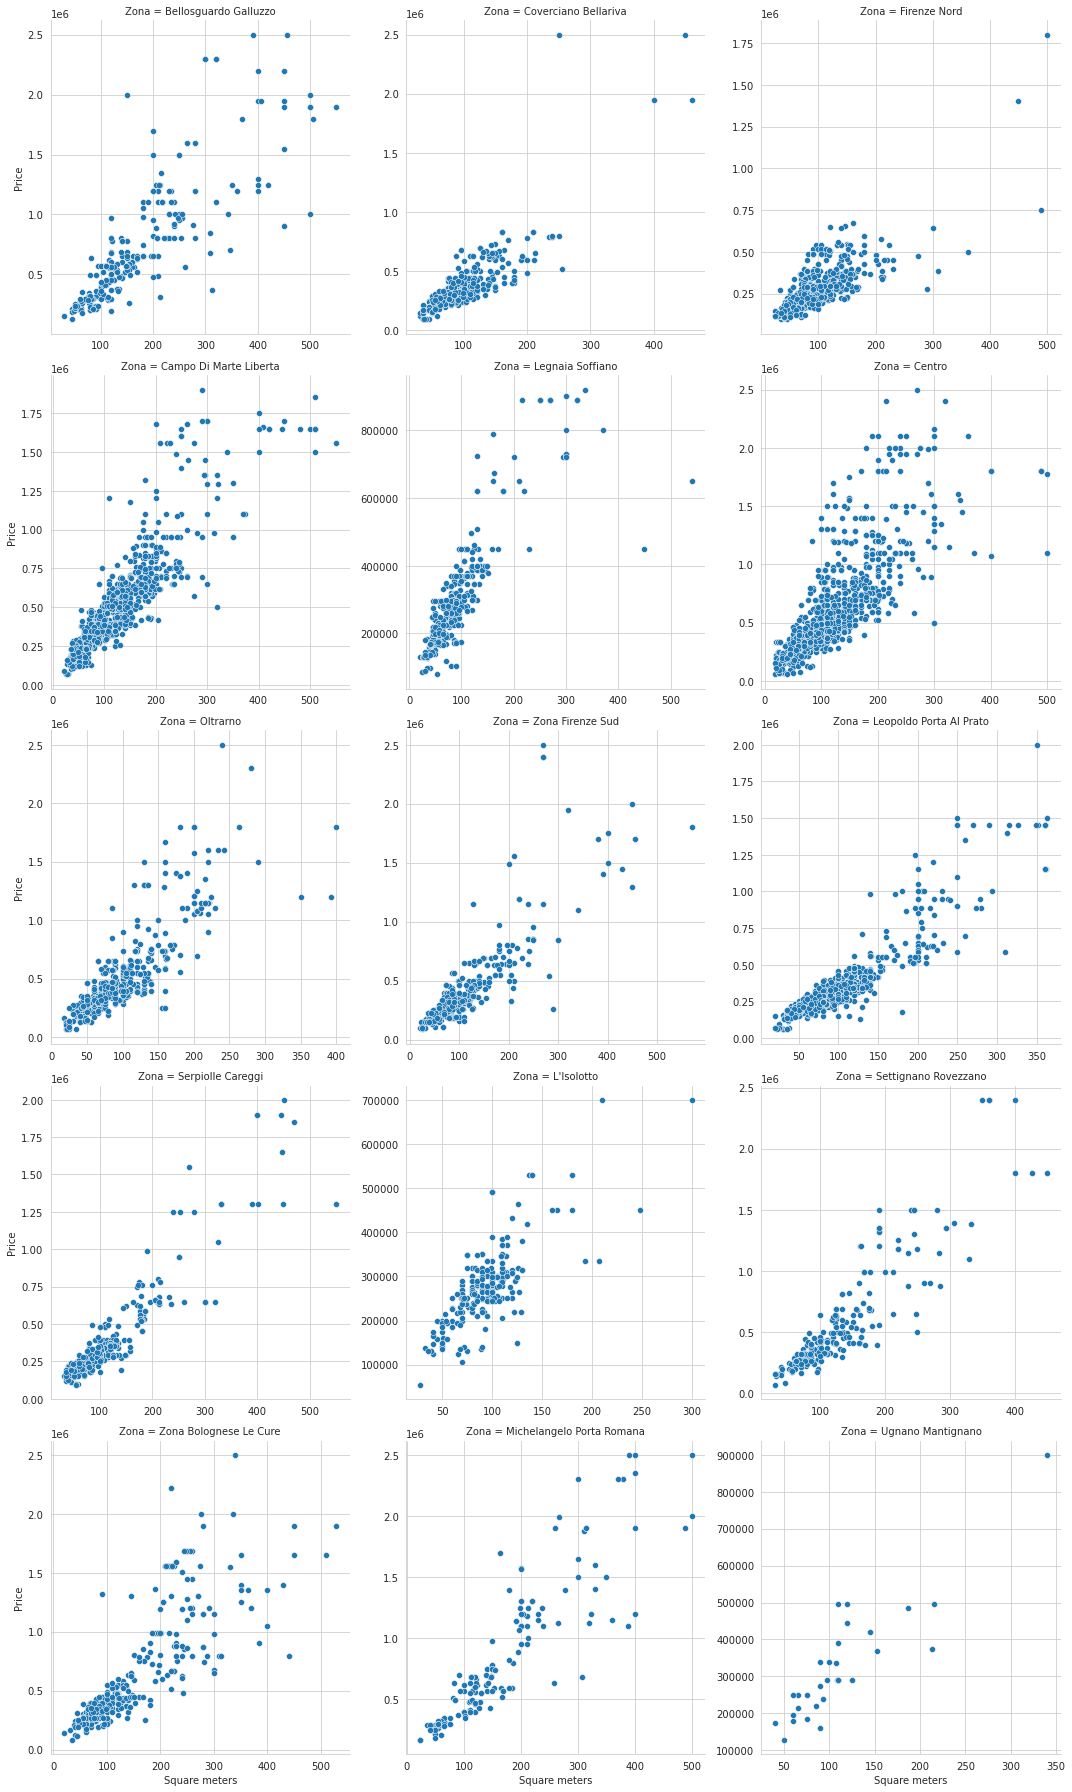

In [7]:
scatters = scatter_per_district(df, col='Zona', row=None, transformation=None)
plt.show()

### 2. Categorical variables

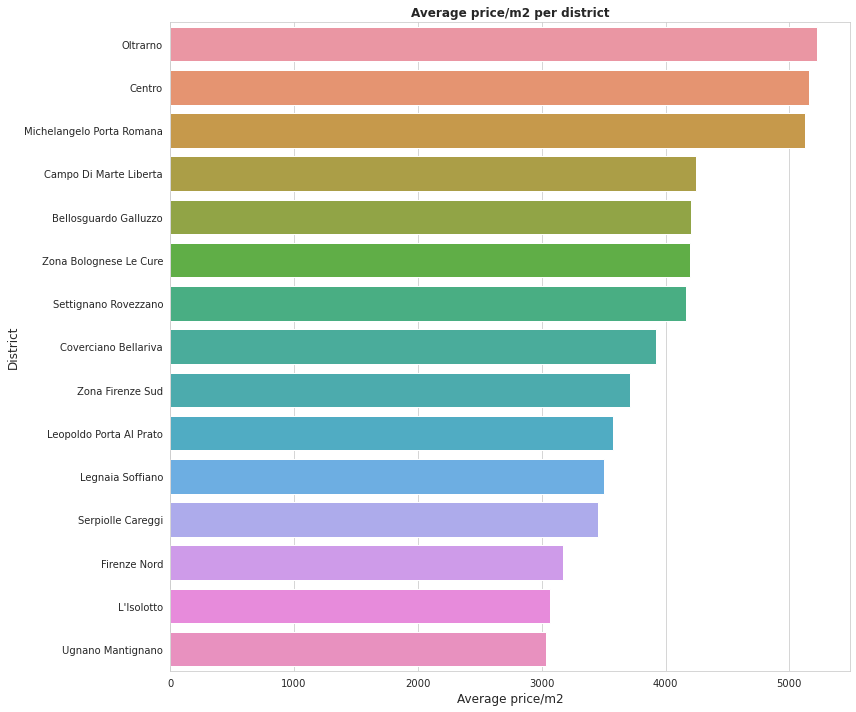

In [8]:
barchart = ordered_barchart(df)
plt.show()

### 3. Correlation plot

In [14]:
df['Stato'].value_counts()

Ottimo_/_Ristrutturato    4446
Buono_/_Abitabile         2357
Nuovo_/_In_costruzione     890
Da_ristrutturare           670
Name: Stato, dtype: int64

In [15]:
df['Stato_num'] = df['Stato'].replace({'Nuovo_/_In_costruzione': 4,
                                       'Ottimo_/_Ristrutturato': 3,
                                       'Buono_/_Abitabile': 2,
                                       'Da_ristrutturare': 1
                                       })

In [19]:
df['Tipo_proprietà'].value_counts()
df['prop_num'] = df['Tipo_proprietà'].replace({'immobile di lusso': 4,
                                               'classe immobile signorile': 3,
                                               'classe immobile media': 2,
                                               'classe immobile economica': 1
                                               })

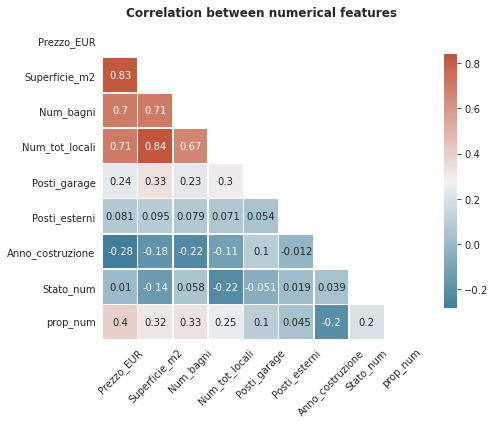

In [20]:
corr_cols = ['Prezzo_EUR', 'Superficie_m2', 'Num_bagni', 'Num_tot_locali', 'Posti_garage', 'Posti_esterni',
              'Anno_costruzione', 'Stato_num', 'prop_num']
corr_plot = correlation_plot(df, corr_cols)